In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
batch_size = 5

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/train',target_size=(300, 300), batch_size=batch_size,class_mode='categorical') 
validation_generator = test_datagen.flow_from_directory('data/test',target_size=(300, 300), batch_size=batch_size,class_mode='categorical')

Found 1686 images belonging to 5 classes.
Found 891 images belonging to 5 classes.


D:\Anaconda\lib\site-packages\keras_preprocessing\image\utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


In [5]:
#Architechture1
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [8]:
model.fit_generator(train_generator,steps_per_epoch=25,epochs=15,validation_data=validation_generator,validation_steps=10)

Epoch 1/15
25/25 [==============================] - 12s 471ms/step - loss: 0.8217 - accuracy: 0.7200 - val_loss: 0.6467 - val_accuracy: 0.8000
Epoch 2/15
25/25 [==============================] - 13s 515ms/step - loss: 0.8308 - accuracy: 0.6480 - val_loss: 0.6990 - val_accuracy: 0.7200
Epoch 3/15
25/25 [==============================] - 12s 463ms/step - loss: 0.7609 - accuracy: 0.7360 - val_loss: 0.4152 - val_accuracy: 0.8200
Epoch 4/15
25/25 [==============================] - 12s 464ms/step - loss: 0.7954 - accuracy: 0.7200 - val_loss: 0.4408 - val_accuracy: 0.7600
Epoch 5/15
25/25 [==============================] - 14s 559ms/step - loss: 0.8594 - accuracy: 0.6720 - val_loss: 0.3613 - val_accuracy: 0.8400
Epoch 6/15
25/25 [==============================] - 11s 454ms/step - loss: 0.7747 - accuracy: 0.7520 - val_loss: 0.4057 - val_accuracy: 0.9200
Epoch 7/15
25/25 [==============================] - 11s 447ms/step - loss: 0.6751 - accuracy: 0.7600 - val_loss: 0.2645 - val_accuracy: 0.9000

In [9]:
#Architechture2
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [10]:
model.fit_generator(train_generator,steps_per_epoch=10,epochs=10,validation_data=validation_generator,validation_steps=10)

Epoch 1/10
10/10 [==============================] - 6s 580ms/step - loss: 2.5393 - accuracy: 0.2609 - val_loss: 1.6353 - val_accuracy: 0.1400
Epoch 2/10
10/10 [==============================] - 5s 509ms/step - loss: 1.6388 - accuracy: 0.2400 - val_loss: 1.6047 - val_accuracy: 0.2000
Epoch 3/10
10/10 [==============================] - 5s 505ms/step - loss: 1.6056 - accuracy: 0.2200 - val_loss: 1.6482 - val_accuracy: 0.2600
Epoch 4/10
10/10 [==============================] - 6s 610ms/step - loss: 1.6243 - accuracy: 0.1200 - val_loss: 1.5517 - val_accuracy: 0.3800
Epoch 5/10
10/10 [==============================] - 5s 513ms/step - loss: 1.5907 - accuracy: 0.2800 - val_loss: 2.1025 - val_accuracy: 0.1800
Epoch 6/10
10/10 [==============================] - 5s 512ms/step - loss: 1.5967 - accuracy: 0.3200 - val_loss: 1.3705 - val_accuracy: 0.4800
Epoch 7/10
10/10 [==============================] - 5s 516ms/step - loss: 1.3889 - accuracy: 0.5200 - val_loss: 1.0375 - val_accuracy: 0.5600
Epoch 

In [11]:
#Architechture3
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [13]:
model.fit_generator(train_generator,steps_per_epoch=10,epochs=10,validation_data=validation_generator,validation_steps=10)

Epoch 1/10
10/10 [==============================] - 16s 1s/step - loss: 1.7672 - accuracy: 0.2000 - val_loss: 1.6132 - val_accuracy: 0.1200
Epoch 2/10
10/10 [==============================] - 14s 1s/step - loss: 1.6083 - accuracy: 0.1800 - val_loss: 1.6068 - val_accuracy: 0.2600
Epoch 3/10
10/10 [==============================] - 14s 1s/step - loss: 1.6119 - accuracy: 0.1000 - val_loss: 1.6071 - val_accuracy: 0.2800
Epoch 4/10
10/10 [==============================] - 14s 1s/step - loss: 1.6364 - accuracy: 0.1600 - val_loss: 1.6085 - val_accuracy: 0.2200
Epoch 5/10
10/10 [==============================] - 15s 2s/step - loss: 1.6129 - accuracy: 0.1600 - val_loss: 1.6088 - val_accuracy: 0.2200
Epoch 6/10
10/10 [==============================] - 14s 1s/step - loss: 1.6097 - accuracy: 0.1600 - val_loss: 1.6105 - val_accuracy: 0.2200
Epoch 7/10
10/10 [==============================] - 14s 1s/step - loss: 1.6073 - accuracy: 0.3000 - val_loss: 1.6118 - val_accuracy: 0.1600
Epoch 8/10
10/10 [==

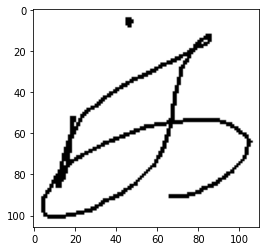

In [16]:
img = mpimg.imread('tamil ikk.tiff')
imgplot = plt.imshow(img)
plt.show()

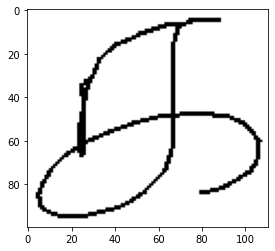

In [18]:
img1 = mpimg.imread('tamil ka.tiff')
imgplot1 = plt.imshow(img1)
plt.show()

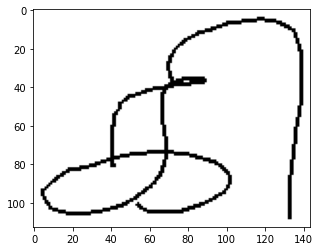

In [19]:
img2 = mpimg.imread('tamil kee.tiff')
imgplot2 = plt.imshow(img2)
plt.show()

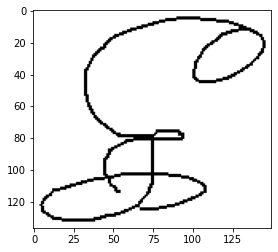

In [20]:
img3 = mpimg.imread('tamil keeeee.tiff')
imgplot3 = plt.imshow(img3)
plt.show()

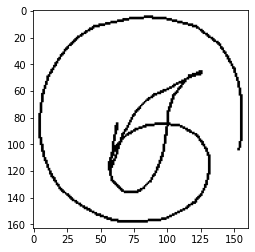

In [21]:
img4 = mpimg.imread('tamil koo.tiff')
imgplot4 = plt.imshow(img4)
plt.show()